# **word ngram**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/seema/2nd_data.csv')
df.head()

,Tweet,True Label,Sub,sub_labels
0,هذا تاريخ الخبيث اللي تروجله ياوهمي متطرف اخون...,1,P-HS,0
1,في نتألم جميعا كيف اصبح حال الشعب اليمني المظل...,1,P-HS,0
2,من كان يتوقع أن السعودية التي كانت تعاقب من يف...,1,R-HS,1
3,لن نجد اخس واذل من مان يستهدفون المدنيين ويقتل...,1,S-HS,2
4,إمعة وغبي وكذاب صفات الرئيس المنتدب الفطرية,1,P-HS,0


In [ ]:
y =  df['sub_labels'].values

Training for fold 1 ...
Confusion Matrix for fold 1:


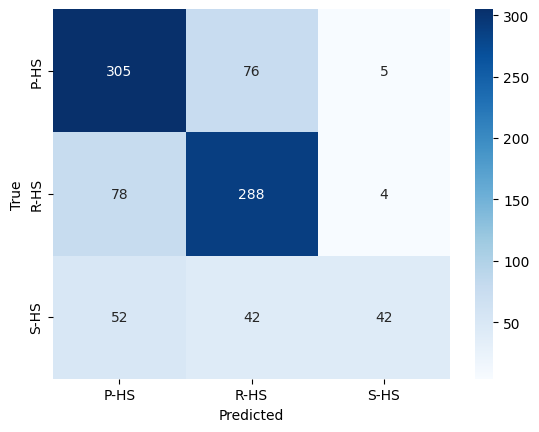

Training for fold 2 ...
Confusion Matrix for fold 2:


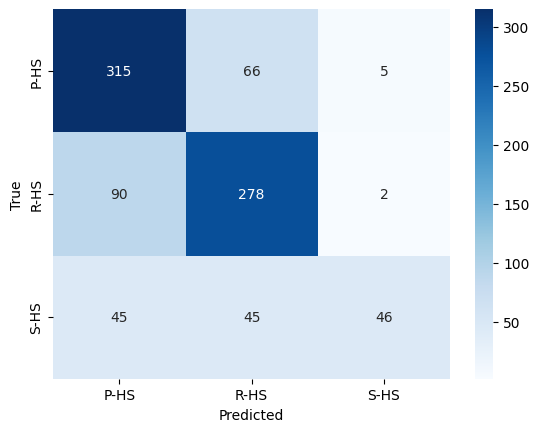

Training for fold 3 ...
Confusion Matrix for fold 3:


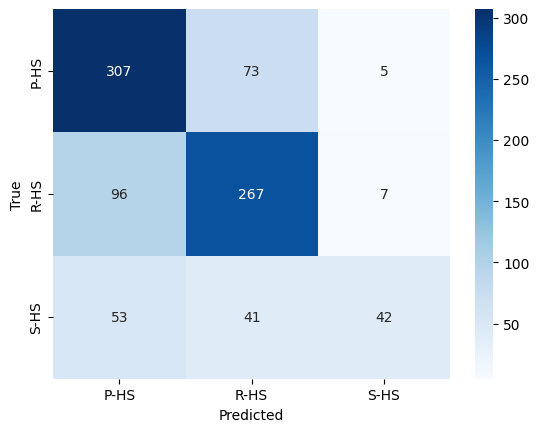

Training for fold 4 ...
Confusion Matrix for fold 4:


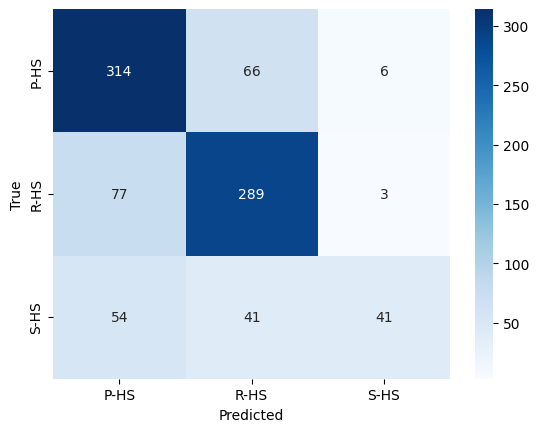

Training for fold 5 ...
Confusion Matrix for fold 5:


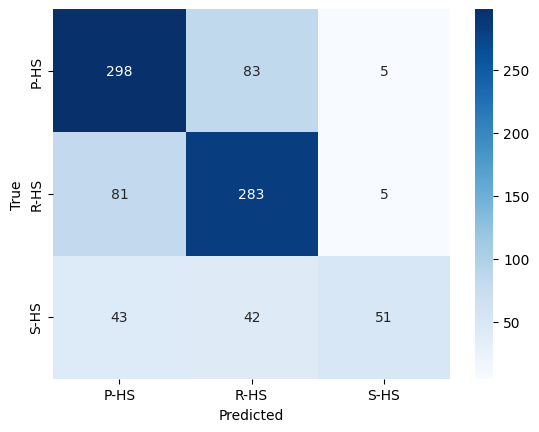


Mean Metrics Across All Folds:
Mean Accuracy: 0.7103415822399379
Mean Precision: 0.7439797893645906
Mean Recall: 0.6281968157230012
Mean F1 Score: 0.6484380842002034

Aggregated Confusion Matrix:


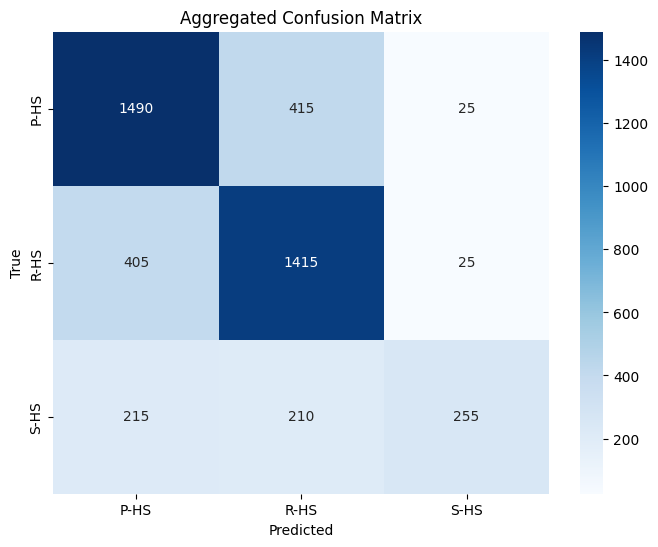

In [ ]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Tweet']).toarray()

# Step 3: Stratified 5-Fold Cross-Validation for Logistic Regression
skf = StratifiedKFold(n_splits=5)
scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_tfidf, y)):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000)

    # Train the model
    print(f'Training for fold {fold + 1} ...')
    lr_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[2, 0, 1])  # Labels order: S-HS, P-HS, R-HS
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(np.sum(np.array([confusion_matrix(y_test, lr_model.predict(X_test), labels=[2, 0, 1]) for _, (_, test_index) in enumerate(skf.split(X_tfidf, y))]), axis=0),
            annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Confusion Matrix')
plt.show()


# **char n grame**

Training for fold 1 ...
Confusion Matrix for fold 1:


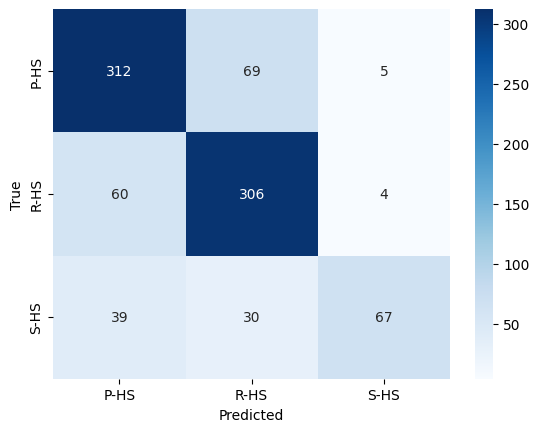

Training for fold 2 ...
Confusion Matrix for fold 2:


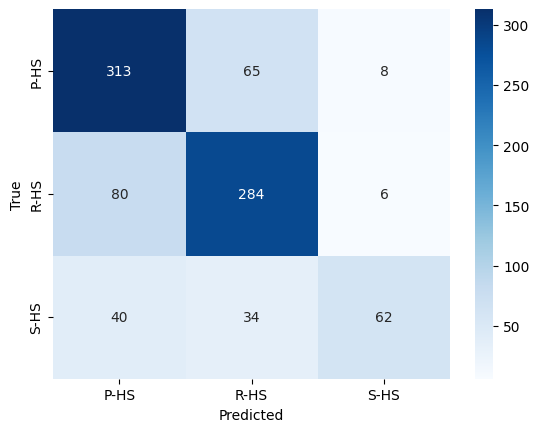

Training for fold 3 ...
Confusion Matrix for fold 3:


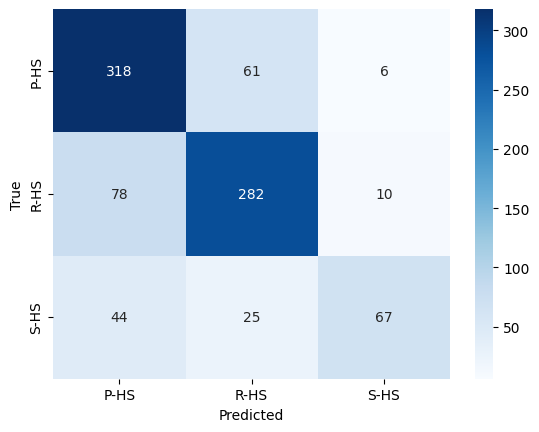

Training for fold 4 ...
Confusion Matrix for fold 4:


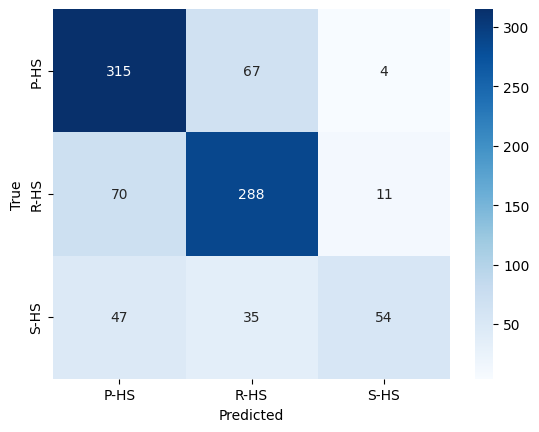

Training for fold 5 ...
Confusion Matrix for fold 5:


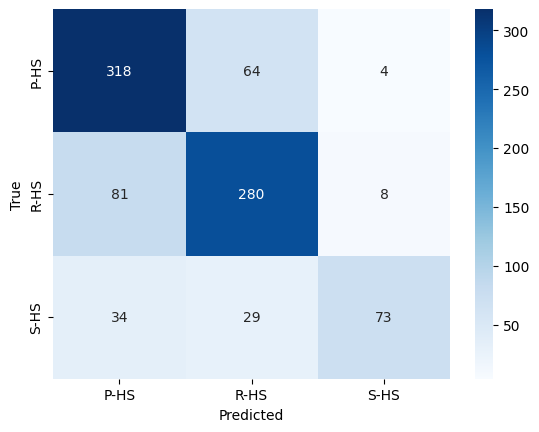


Mean Metrics Across All Folds:
Mean Accuracy: 0.7491567392912686
Mean Precision: 0.7711218972665067
Mean Recall: 0.6904062355465111
Mean F1 Score: 0.7135378142731434

Aggregated Confusion Matrix:


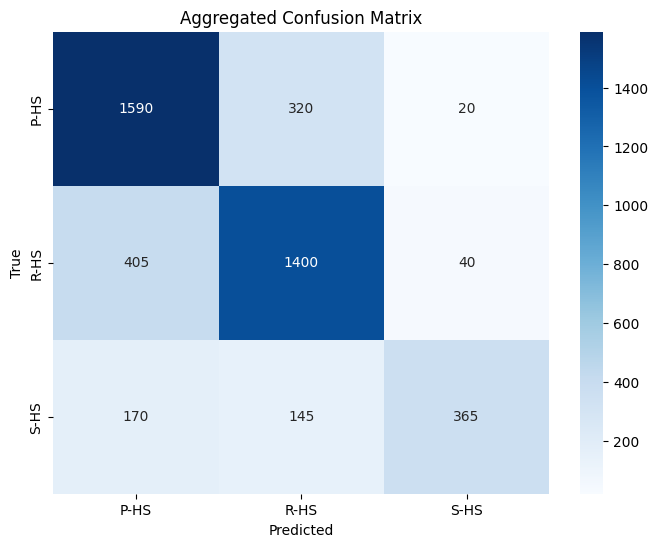

In [ ]:

tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Tweet']).toarray()

# Step 3: Stratified 5-Fold Cross-Validation for Logistic Regression
skf = StratifiedKFold(n_splits=5)
scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_tfidf, y)):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000)

    # Train the model
    print(f'Training for fold {fold + 1} ...')
    lr_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[2, 0, 1])  # Labels order: S-HS, P-HS, R-HS
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(np.sum(np.array([confusion_matrix(y_test, lr_model.predict(X_test), labels=[2, 0, 1]) for _, (_, test_index) in enumerate(skf.split(X_tfidf, y))]), axis=0),
            annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Confusion Matrix')
plt.show()


# **word /chr ngrame**

In [ ]:
y =  df['sub_labels']

Training for fold 1 ...
Confusion Matrix for fold 1:


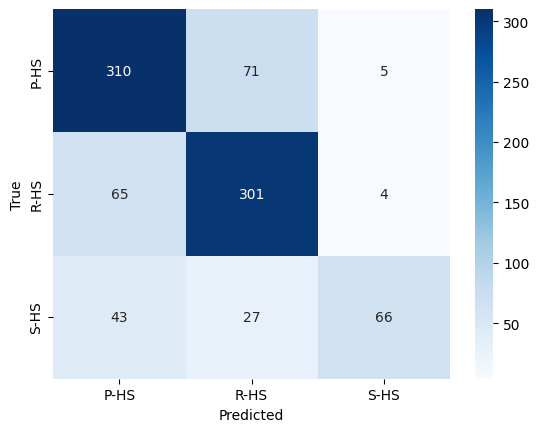

Training for fold 2 ...
Confusion Matrix for fold 2:


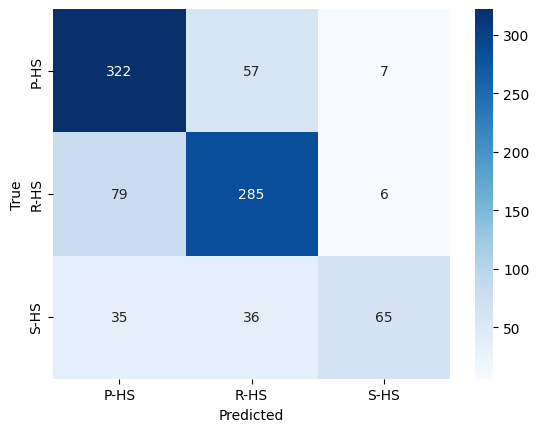

Training for fold 3 ...
Confusion Matrix for fold 3:


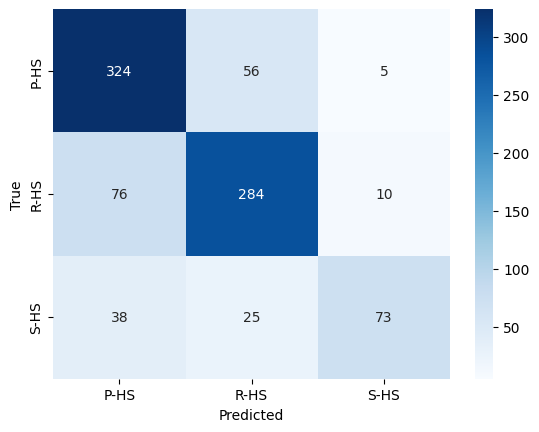

Training for fold 4 ...
Confusion Matrix for fold 4:


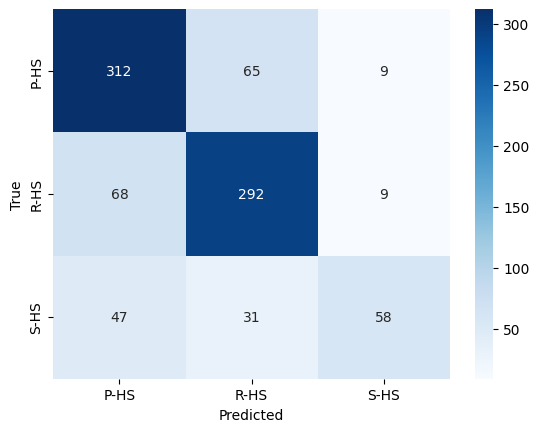

Training for fold 5 ...
Confusion Matrix for fold 5:


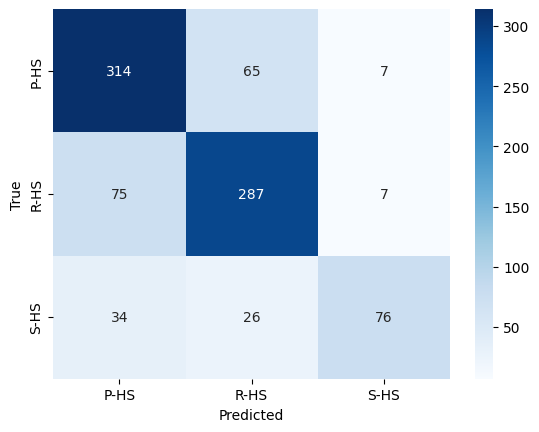


Mean Metrics Across All Folds:
Mean Accuracy: 0.7558894878027912
Mean Precision: 0.7761089993396225
Mean Recall: 0.7004251306084476
Mean F1 Score: 0.7231918346730104

Aggregated Confusion Matrix:


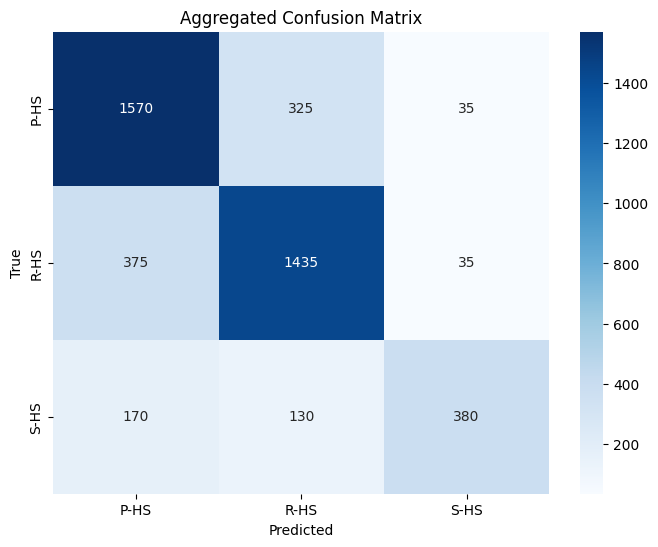

In [ ]:
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=5000)
X_tfidf_char = tfidf_vectorizer.fit_transform(df['Tweet']).toarray()

# Word n-grams
tfidf_vectorizer_word = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), max_features=5000)
X_tfidf_word = tfidf_vectorizer_word.fit_transform(df['Tweet']).toarray()

# Combine char and word n-grams
X_tfidf_combined = np.concatenate((X_tfidf_char, X_tfidf_word), axis=1)

# Step 3: Stratified 5-Fold Cross-Validation for LR
skf = StratifiedKFold(n_splits=5)
scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_tfidf_combined, y)):
    X_train, X_test = X_tfidf_combined[train_index], X_tfidf_combined[test_index]
    train_indices = df.index[train_index]
    test_indices = df.index[test_index]

    y_train, y_test = y.loc[train_indices], y.loc[test_indices]

    # Initialize the LR model
    lr_model = LogisticRegression(max_iter=1000)

    # Train the model
    print(f'Training for fold {fold + 1} ...')
    lr_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[2, 0, 1])
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(np.sum(np.array([confusion_matrix(y_test, lr_model.predict(X_test), labels=[2, 0, 1]) for _, (_, test_index) in enumerate(skf.split(X_tfidf_combined, y))]), axis=0),
            annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Confusion Matrix')
plt.show()


In [ ]:
y =  df['sub_labels'].values

Training for fold 1 ...
Confusion Matrix for fold 1:


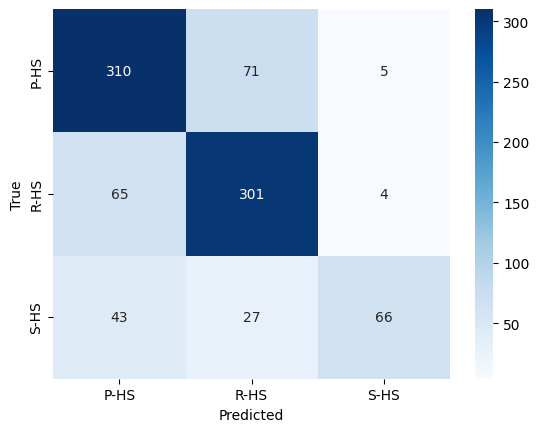

Training for fold 2 ...
Confusion Matrix for fold 2:


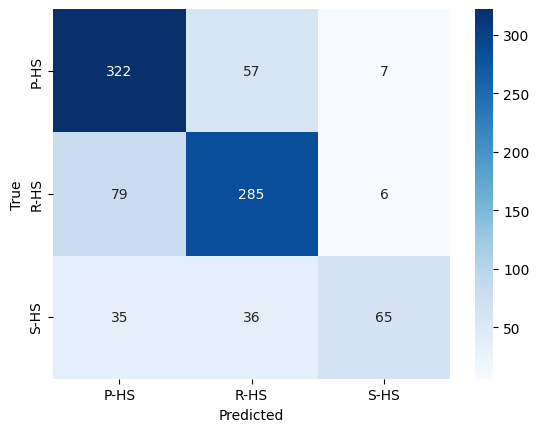

Training for fold 3 ...
Confusion Matrix for fold 3:


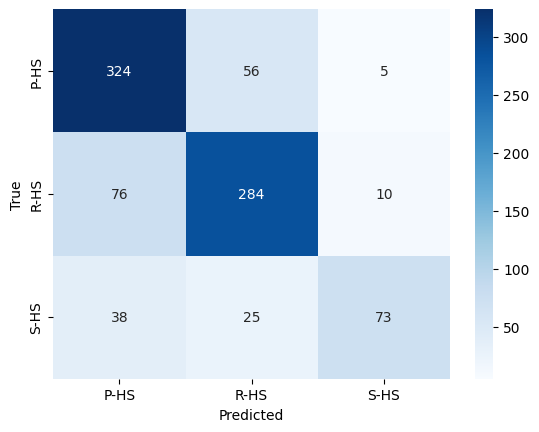

Training for fold 4 ...
Confusion Matrix for fold 4:


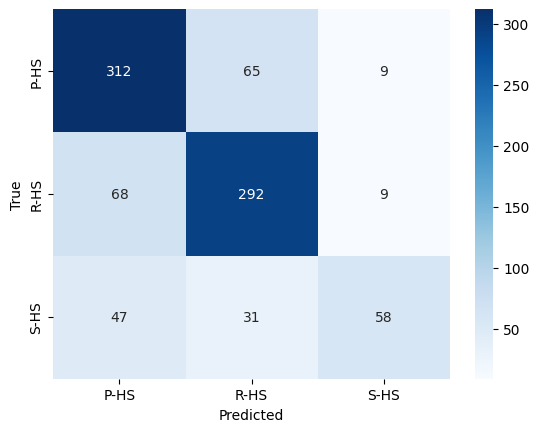

Training for fold 5 ...
Confusion Matrix for fold 5:


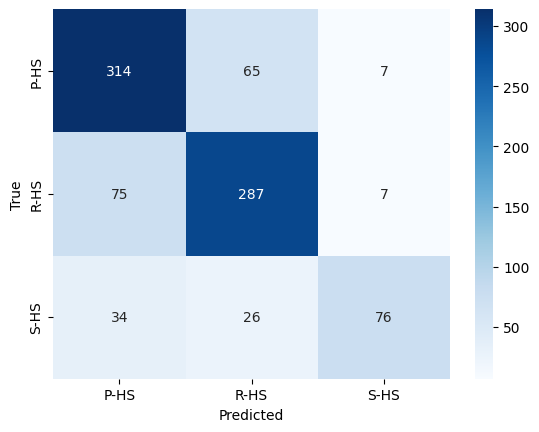


Mean Metrics Across All Folds:
Mean Accuracy: 0.7558894878027912
Mean Precision: 0.7761089993396225
Mean Recall: 0.7004251306084476
Mean F1 Score: 0.7231918346730104

Aggregated Confusion Matrix:


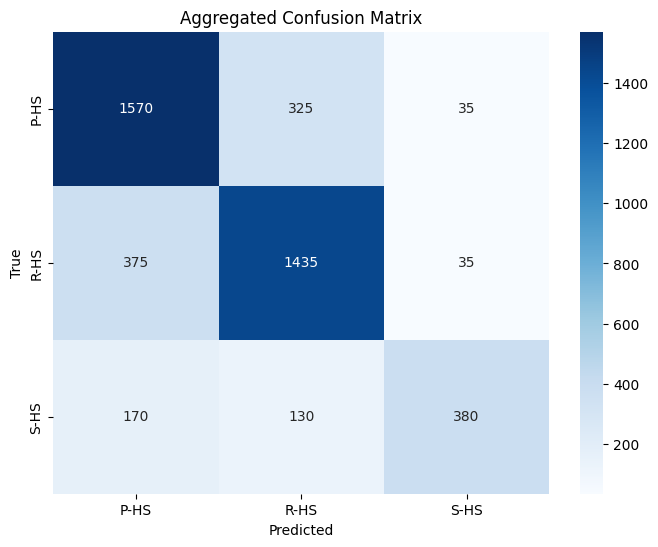

In [ ]:
# Using a combination of character and word n-grams
tfidf_vectorizer_char = TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=5000)
X_tfidf_char = tfidf_vectorizer_char.fit_transform(df['Tweet']).toarray()

tfidf_vectorizer_word = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), max_features=5000)
X_tfidf_word = tfidf_vectorizer_word.fit_transform(df['Tweet']).toarray()

# Concatenate the features from character and word n-grams
X_tfidf_combined = np.concatenate((X_tfidf_char, X_tfidf_word), axis=1)

# Step 3: Stratified 5-Fold Cross-Validation for Logistic Regression
skf = StratifiedKFold(n_splits=5)
scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_tfidf_combined, y)):
    X_train, X_test = X_tfidf_combined[train_index], X_tfidf_combined[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000)

    # Train the model
    print(f'Training for fold {fold + 1} ...')
    lr_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[2, 0, 1])  # Labels order: S-HS, P-HS, R-HS
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(np.sum(np.array([confusion_matrix(y_test, lr_model.predict(X_test), labels=[2, 0, 1]) for _, (_, test_index) in enumerate(skf.split(X_tfidf_combined, y))]), axis=0),
            annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Confusion Matrix')
plt.show()


In [5]:
df['Sub'].unique()

array(['P-HS', 'R-HS', 'S-HS'], dtype=object)

In [4]:
df

,Tweet,True Label,Sub,sub_labels
0,هذا تاريخ الخبيث اللي تروجله ياوهمي متطرف اخون...,1,P-HS,0
1,في نتألم جميعا كيف اصبح حال الشعب اليمني المظل...,1,P-HS,0
2,من كان يتوقع أن السعودية التي كانت تعاقب من يف...,1,R-HS,1
3,لن نجد اخس واذل من مان يستهدفون المدنيين ويقتل...,1,S-HS,2
4,إمعة وغبي وكذاب صفات الرئيس المنتدب الفطرية,1,P-HS,0
...,...,...,...,...
4452,أظن يا أخي أنه يجب على شعب الخليج أن يُخرجوا ح...,1,P-HS,0
4453,في خطوة هي الأولى من نوعها، يعترف رجل الأعمال ...,1,P-HS,0
4454,كذبت الشعب التركي همجي بخيل ولا يقدم شيئاً لاح...,1,S-HS,2
4455,وهناك مسلمين يكرهون كل من غير مسلم اشد كراهية ...,1,R-HS,1


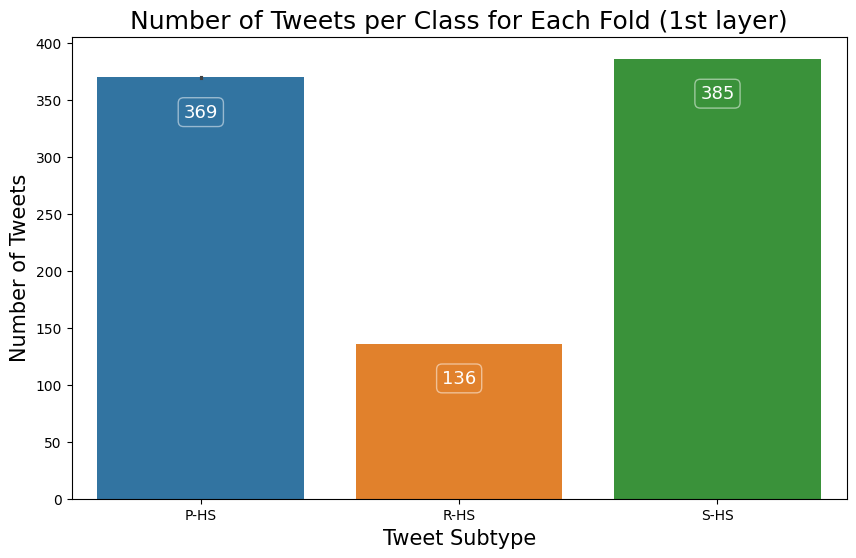

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold

# Load your data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/seema/2nd_data.csv')

labels = df['sub_labels'].values
tweets = df['Tweet'].values

# Initialize lists to store class counts for each fold
fold_class_counts = []

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(tweets, labels)):
    # Get the labels for the validation set of this fold
    y_val_fold = labels[val_idx]

    # Count occurrences of each class in the validation set of this fold
    unique_classes, class_counts = np.unique(y_val_fold, return_counts=True)
    fold_class_counts.append(class_counts)

# Convert fold_class_counts to a DataFrame for easier plotting
fold_class_counts_df = pd.DataFrame(fold_class_counts, columns=np.unique(labels))
fold_class_counts_df.columns = ['P-HS', 'R-HS', 'S-HS']  # Assuming class labels are 'P-HS', 'R-HS', 'S-HS'

# Plotting
categories = ['NHS', 'HS']  # Assuming categories for the class labels

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Using seaborn barplot to show the number of data in each class for each fold
sns.barplot(data=fold_class_counts_df, ax=ax)

# Annotate each bar with custom category names and counts
for a, p in enumerate(ax.patches):
    category_index = a % len(categories)  # Get the index of the category for this bar
    category_name = categories[category_index]

    # Format annotation to include category name and count (bold text)
    annotation_text = f'{int(p.get_height())}'  # \033[1m and \033[0m for bold text

    ax.annotate(annotation_text,
                xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                xytext=(0, -25),
                size=13,
                color='white',
                ha='center',
                va='center',
                textcoords='offset points',
                bbox=dict(boxstyle='round', facecolor='none', edgecolor='white', alpha=0.5))

# Set labels and title
plt.xlabel('Tweet Subtype', size=15)
plt.ylabel('Number of Tweets', size=15)
plt.title('Number of Tweets per Class for Each Fold (1st layer)', size=18)

# Show plot
plt.show()
